## Prueba #0204

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

#### Leer los datos.

In [2]:
# Ir al directorio en el que se encuentra el archivo. 
os.chdir(r'./')                # Reemplazar por la ruta correcta.

In [3]:
df = pd.read_csv('data_coffeeshop.csv', header='infer',na_values=[' '])

In [4]:
df.shape

(43182, 3)

In [5]:
df.head(5)

,yearOfStart,CurrentState,sizeOfsite
0,2008.0,In,20.80
1,2010.0,In,212.72
2,2013.0,In,20.04
3,2012.0,In,64.17
4,2002.0,Out,11.40


#### Responda las siguientes cuestiones.

1). Haga una tabla de frecuencia de 'yearOfStart' y visualícela por año.
- Ordenar por año.
- Dibuje una gráfica de línea de 1997 a 2014. <= Pista: plt.xlim ()

In [6]:
df_frequency = pd.DataFrame(data = {"frequency" : df.groupby("yearOfStart").size()})

In [7]:
# Ordenada por año
df_frequency.sort_index()

,frequency
yearOfStart,
1964.0,2
1966.0,2
1967.0,3
1968.0,1
1969.0,2
1970.0,4
1971.0,6
1972.0,3
1974.0,1


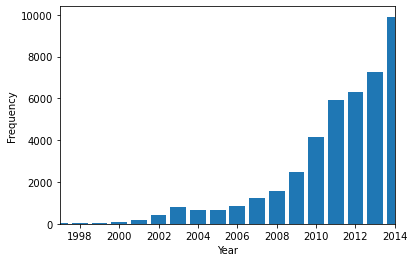

In [8]:
# Gráfica de línea de 1997 a 2014.
plt.xlim ([1997, 2014])
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.bar(df_frequency.index, df_frequency.frequency)
plt.show()

<AxesSubplot:xlabel='yearOfStart'>

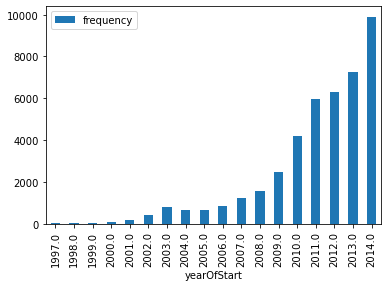

In [9]:
# Otra solución más sencilla
# Gráfica de línea de 1997 a 2014.
df_current_state_filter = df_frequency.iloc[lambda x: (x.index >= 1997) & (x.index <= 2014)]
df_current_state_filter.plot(kind='bar')

2). Ahora, divida los datos por el estado actual del negocio ('In' o 'Out' del negocio). Luego, visualice la tendencia anual de las frecuencias 'yearOfStart'.
- Ordenar por año.
- Dibuja dos gráficos de líneas superpuestas de 1997 a 2014.
- Use el objeto 'figure'.

In [10]:
df_current_state = df.pivot_table(index=["yearOfStart"], columns="CurrentState", aggfunc=["count"], fill_value=0)["count"]["sizeOfsite"]
df_current_state
# Al ser un índice tipo numérico, lo ordena ascendentemente
# df_current_state.sort_index(ascending = True)

CurrentState,In,Out
yearOfStart,,
1964.0,0,2
1966.0,0,2
1967.0,2,1
1968.0,0,1
1969.0,0,2
1970.0,2,2
1971.0,4,2
1972.0,2,1
1974.0,1,0


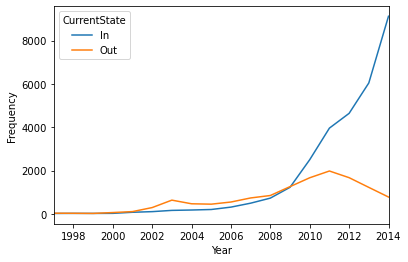

In [11]:
# Gráfica de línea de 1997 a 2014.
plt.figure()
plt.xlim([1997, 2014])
plt.plot(df_current_state.index,  df_current_state.In, label="In")
plt.plot(df_current_state.index, df_current_state.Out,  label="Out")
plt.legend( title="CurrentState")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

3). A partir de los resultados de 1) y 2), ¿cómo puede describir la tendencia en general?

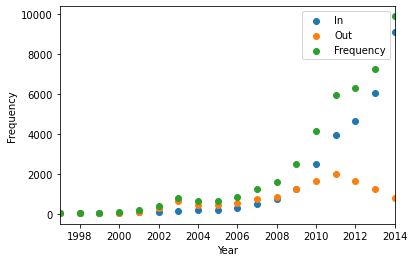

In [12]:
plt.xlim([1997, 2014])
plt.scatter(df_current_state.index,  df_current_state.In, label="In")
plt.scatter(df_current_state.index, df_current_state.Out, label="Out")
plt.scatter(df_frequency.index, df_frequency.frequency, label="Frequency")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()